## Szükséges könyvtárak telepítése és importálása

In [1]:
#%pip install noise

In [2]:
#https://www.gorillasun.de/blog/making-of-grand-canyon/

from PIL import Image, ImageDraw
import random
import noise

## Színválasztó

Ez egy Függvény véletlen RBG értékek generálására.

In [3]:
def genColor():
    r = random.randrange(0,255)
    g = random.randrange(0,255)
    b = random.randrange(0,255)
    return(r,g,b)

## Szükséges változók és kép adatainak meghatározása

A kép meretét a sorok, oszlopok mennyisége és keret mérete alapján számítjuk.

In [4]:
num_rows = 20
num_columns = 40
cell_size = 25
frame = 200
offsetx = frame/2+2
offsety = frame/2-2

image_width = num_columns * cell_size + frame
image_height = num_rows * cell_size + frame

## Rajzterületet kitöltő pontok és azokat határoló keret létrehozása

A PIL könyvtár által kínált <code>draw.point</code> nem tartalmaz körvonalat és mérete nem állítható, emiatt célszerű a pontokat <code>draw.ellipse</code> utasítással rajzolni.

In [5]:
def prepareCanvas():    
    for i in range (num_columns+1):
        for j in range (num_rows+1):                 
            draw.ellipse([i*cell_size+offsety,j*cell_size+offsety,i*cell_size+offsetx,j*cell_size+offsetx],fill="black")

    draw.rectangle([50,50,1150,650], outline="black", width=5) 

## 1. Megoldás véletlen számokkal

Minden iterációban egy egységet halad jobbra a minta és a generált véletlen szám a választott sor magasságát (indexét) jelöli.

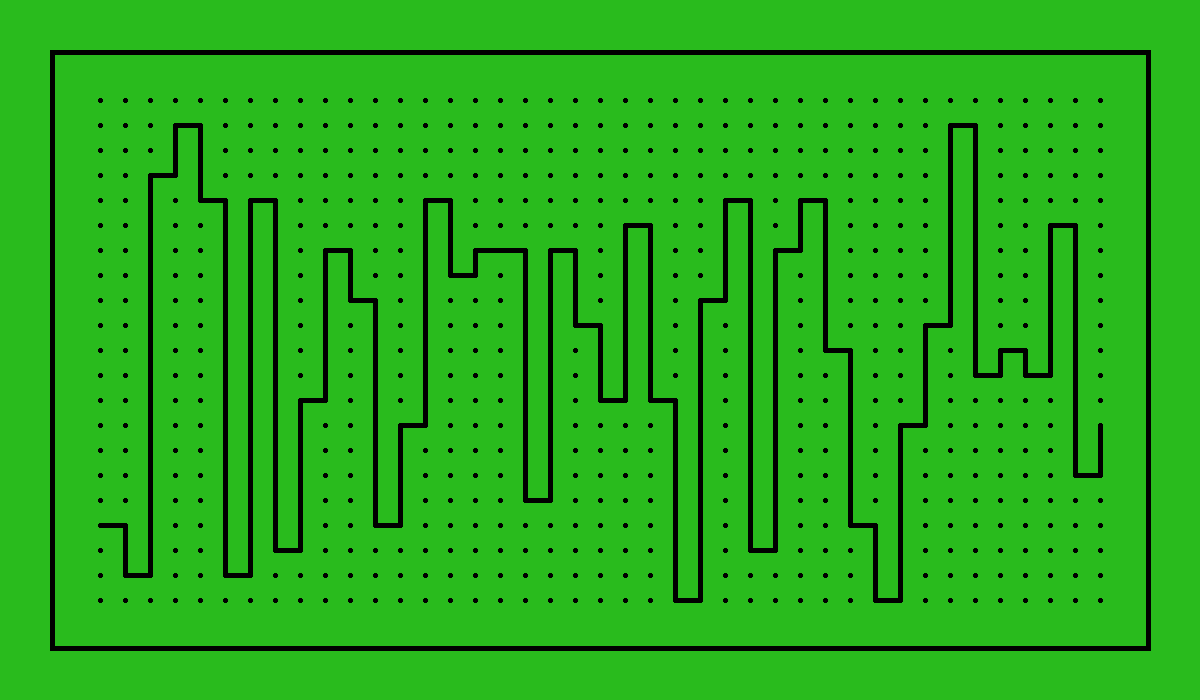

In [6]:
color = genColor()
image = Image.new("RGB", (image_width, image_height), color)
draw = ImageDraw.Draw(image)

prepareCanvas()

x0 = 4
y0 = random.randint(4,24)

for i in range(num_columns):
    x1 = x0+1
    y1 = random.randint(4,24)

    draw.line([x0*cell_size,y0*cell_size,x1*cell_size,y0*cell_size], fill="black", width=5)
    draw.line([x1*cell_size,y0*cell_size,x1*cell_size,y1*cell_size], fill="black", width=5)
    
    y0 = y1
    x0 = x1
  
display(image)

## 2. Megoldás véletlen számokkal

Az alakzat a bal oldalon kezdődik és minden ismétlés során egy egységet mehet fel, le, vagy jobbra. A lépéseket szakaszonként rajzoljuk ki a <code>draw.line</code> utasítással. Véletlen számok generálása során ügyelnünk kell rá, hogy a rajzolt alakzat ne vándoroljon túl a keret határain. A véletlen számok jellegzetes "tüskéket" alakíthatnak ki az alsó, vagy felső határ mentén.

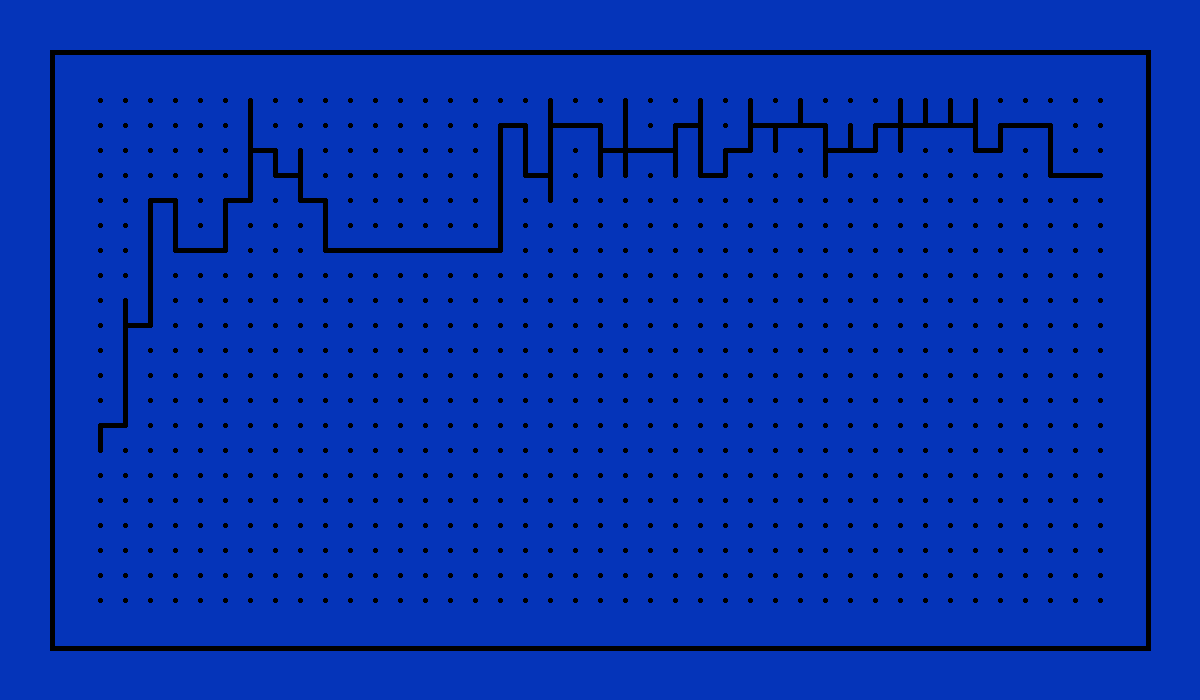

In [7]:
color = genColor()
image = Image.new("RGB", (image_width, image_height), color)
draw = ImageDraw.Draw(image)

prepareCanvas()

x = 4
y = 4 + random.randint(5,15)

while x < num_columns+4:          
    if random.random() >= 0.25 and y > 4 and y < num_rows+4:
        direction = random.randint(0,2)        
        if direction == 0:
            draw.line([x*cell_size,y*cell_size,x*cell_size,(y+1)*cell_size],fill="black", width=5)            
            y+=1
        else:
            draw.line([x*cell_size,y*cell_size,x*cell_size,(y-1)*cell_size],fill="black", width=5)            
            y-=1
    else:
        draw.line([x*cell_size,y*cell_size,(x+1)*cell_size,y*cell_size],fill="black", width=5)        
        x+=1
    if y <= 4:
        y += 1
    elif y > 24:
        y -= 1 
  
display(image)

## Megoldás Perlin zajjal

In [8]:
#https://jameshfisher.com/2017/10/15/1d-perlin-noise/
#https://gpfault.net/posts/perlin-noise.txt.html

import random

# Generate random slopes
slope_at = [(random.random() * 2) - 1 for _ in range(20)]

def sample_perlin(x):
    lo = int(x)
    hi = lo + 1
    dist = x - lo
    lo_slope = slope_at[lo]
    hi_slope = slope_at[hi]
    lo_pos = lo_slope * dist
    hi_pos = -hi_slope * (1 - dist)
    u = dist * dist * (3.0 - 2.0 * dist)  # cubic curve
    return (lo_pos * (1 - u)) + (hi_pos * u)  # interpolate

# Test the function
for i in range(10):
    x = random.random()  # random x values
    result = sample_perlin(x)
    print(f"Sample at x={x}: {result}")



Sample at x=0.3116533190862626: -0.14150004258355386
Sample at x=0.9186621038913763: -0.058383358538552414
Sample at x=0.39593254157198754: -0.17924579238676097
Sample at x=0.8371700858874292: -0.11394820000613232
Sample at x=0.4156188557570629: -0.18630068473524566
Sample at x=0.6341419166508138: -0.20328609600540531
Sample at x=0.5916125825559929: -0.20956026567639258
Sample at x=0.18983434164976154: -0.0750752958295331
Sample at x=0.22459396261046227: -0.0944035300558998
Sample at x=0.879028295869527: -0.08620015977848731


### 1D Perlin zaj

In [9]:
def map_noise(x):

    scale = 0.1
    octaves = 6
    persistence = 0.5
    lacunarity = 2
    base = random.randint(0,10000)
    
    perlin_noise = noise.pnoise1(x*scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity)  
   
    return perlin_noise

### Normalizálás

A Perlin zaj értéket normalizálással átszámoljuk a szamunkra hasznos intervallumra ([4,24] közti egész számok).

In [10]:
def normalizeList(list):
    min_list = -0.32555
    max_list = 0.52675 
    min_interval = 4
    max_interval = 24
    new_list = []

    for item in list:
        normalized_value = (item - min(list))*(max_interval-min_interval)/(max(list)-min(list))+min_interval
        new_list.append(int(normalized_value))
    
    return new_list

### Perlin és normalizált értékek megjelnítése 

-0.32554924488067627 0.5267422795295715


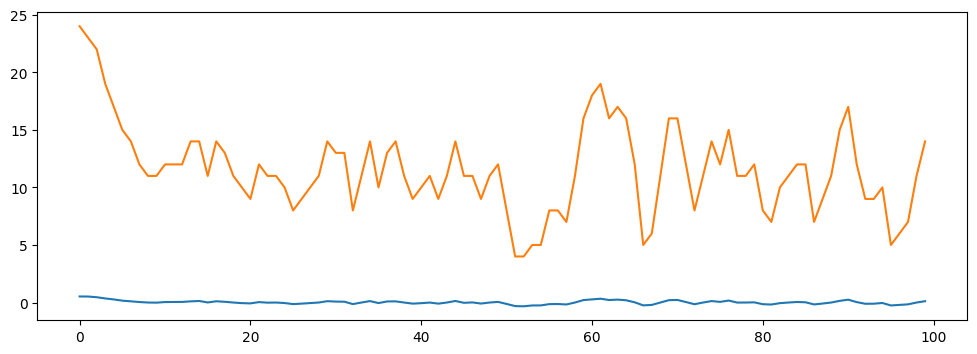

In [11]:
import matplotlib.pyplot as plt

x = 1
y = 2
list = []

for i in range (100):
    x+=1
    y+=1

    list.append(map_noise(x))
print(min(list), max(list))
plt.figure(figsize=(12,4))
fig = plt.plot(list)
fig2 = plt.plot(normalizeList(list))

display(fig)

## Megoldás

In [12]:
def map_noise(x):

    scale = 0.1
    octaves = 6
    persistence = 0.5
    lacunarity = 2   
    
    perlin_noise = noise.pnoise1(x*scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity)  
   
    return perlin_noise

In [13]:
def normalize(item):
    min_list = -0.32555
    max_list = 0.52675 
    min_interval = 4
    max_interval = 24
    
    normalized_value = int((item - min_list)*(max_interval-min_interval)/(max_list-min_list)+min_interval)
        
    return normalized_value

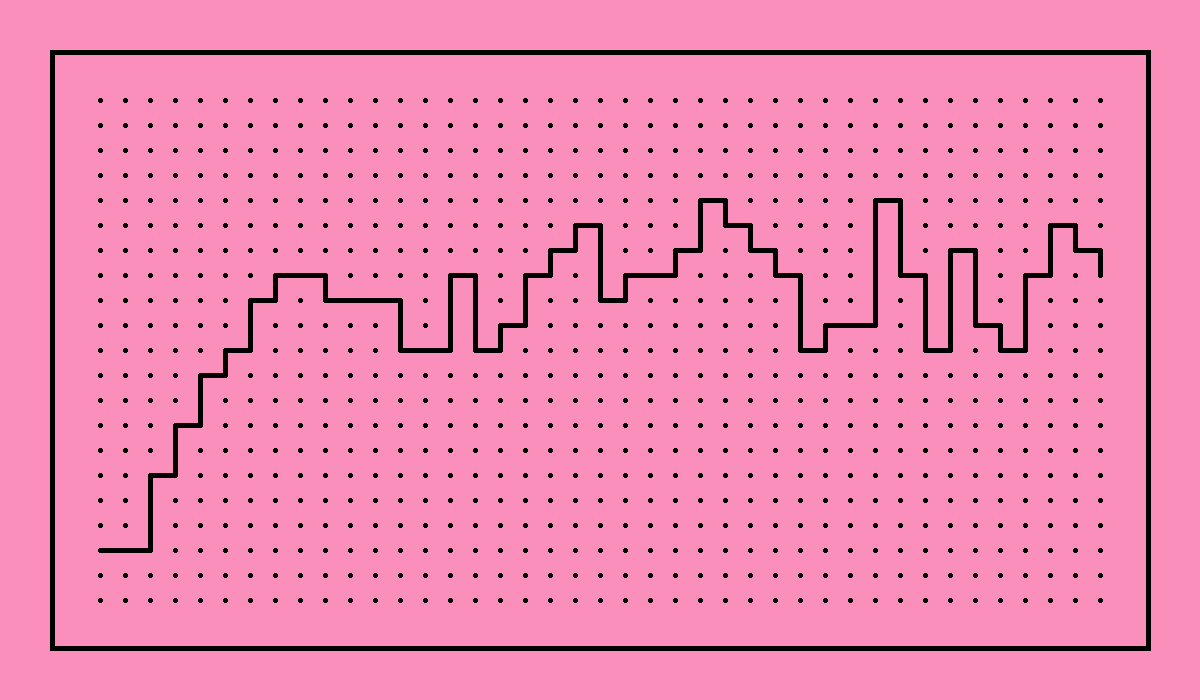

In [14]:
color = genColor()
image = Image.new("RGB", (image_width, image_height), color)
draw = ImageDraw.Draw(image)

prepareCanvas()

x0 = 4
y0 = normalize(map_noise(x0))

for i in range(num_columns):
    x1 = x0+1
    y1 = normalize(map_noise(x0))

    draw.line([x0*cell_size,y0*cell_size,x1*cell_size,y0*cell_size], fill="black", width=5)
    draw.line([x1*cell_size,y0*cell_size,x1*cell_size,y1*cell_size], fill="black", width=5)
    
    y0 = y1
    x0 = x1
  
display(image)